In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATA_DIR = "data"
DATA_FILE = "data.csv"

sns.set()

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA_FILE))
df = df.rename(columns={"data_file": "Dataset", "rank": "Rank", "estimator": "Estimator"})
df.Dataset = df.Dataset.map({"oa": "OA", "movers": "Movers"})
df = df[df.Estimator != "projection"]
df.Estimator = df.Estimator.apply(lambda x: x.capitalize())
max_rank = df.Rank.max()
df["Rank"] = df.Rank.apply(lambda x: max_rank - x)
df.head()

,Rank,true_value,params,ppf025,ppf975,sim_no,Estimator,Dataset
0,49,0.355478,0.355840,0.353710,0.357971,0,Conventional,OA
1,48,0.358469,0.358254,0.356201,0.360306,0,Conventional,OA
2,47,0.358312,0.359647,0.358306,0.360988,0,Conventional,OA
3,46,0.363872,0.364365,0.362012,0.366718,0,Conventional,OA
4,45,0.368923,0.371343,0.368804,0.373883,0,Conventional,OA


In [3]:
df["Coverage"] = ((df.ppf025 <= df.true_value) & (df.true_value <= df.ppf975))
df["Probability bias"] = (df.params > df.true_value).astype(int) - .5
df["Length CI"] = df.ppf975 - df.ppf025
df["Error"] = df.params - df.true_value
df["Absolute error"] = abs(df.params - df.true_value)
df.head()

,Rank,true_value,params,ppf025,ppf975,sim_no,Estimator,Dataset,Coverage,Probability bias,Length CI,Error,Absolute error
0,49,0.355478,0.355840,0.353710,0.357971,0,Conventional,OA,True,0.5,0.004261,0.000363,0.000363
1,48,0.358469,0.358254,0.356201,0.360306,0,Conventional,OA,True,-0.5,0.004105,-0.000215,0.000215
2,47,0.358312,0.359647,0.358306,0.360988,0,Conventional,OA,True,0.5,0.002682,0.001335,0.001335
3,46,0.363872,0.364365,0.362012,0.366718,0,Conventional,OA,True,0.5,0.004706,0.000493,0.000493
4,45,0.368923,0.371343,0.368804,0.373883,0,Conventional,OA,True,0.5,0.005080,0.002420,0.002420


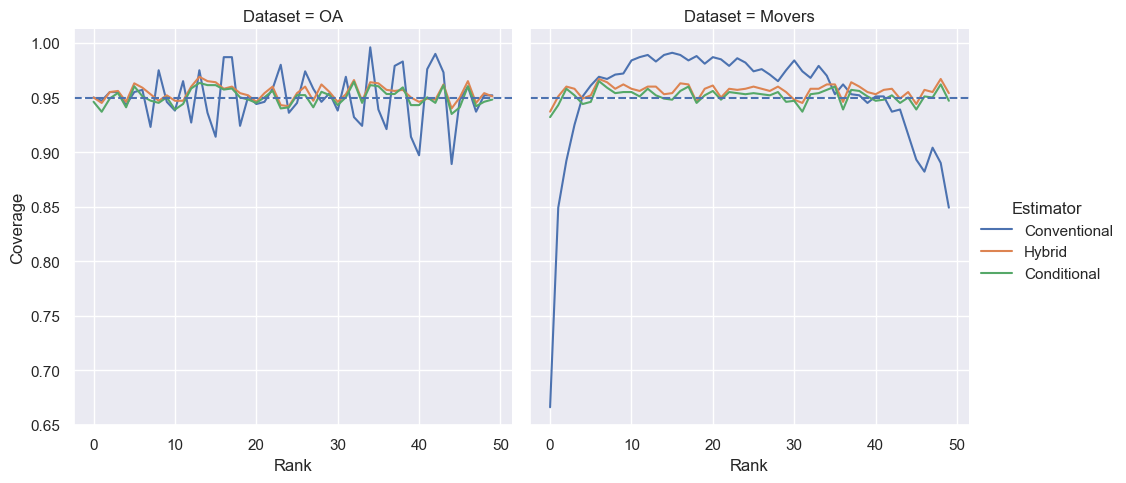

In [4]:
grid = sns.relplot(data=df, x="Rank", y="Coverage", hue="Estimator", ci=None, kind="line", col="Dataset")
for ax in grid.axes[0]:
    ax.axhline(.95, linestyle="--")
grid.fig.savefig("plots/coverage.png")
plt.show()

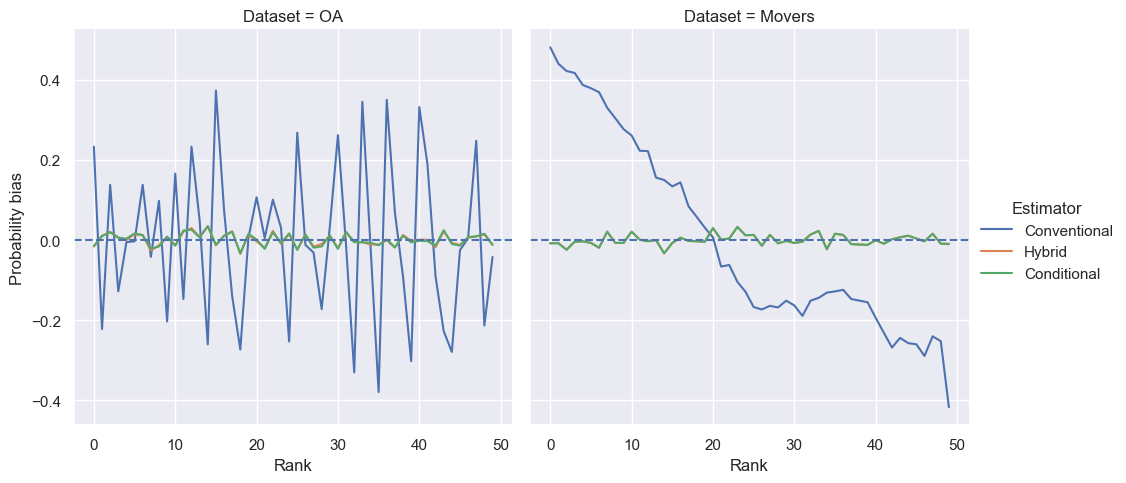

In [5]:
grid = sns.relplot(data=df, x="Rank", y="Probability bias", hue="Estimator", ci=None, kind="line", col="Dataset")
for ax in grid.axes[0]:
    ax.axhline(0, linestyle="--")
grid.fig.savefig("plots/probability_bias.png")
plt.show()

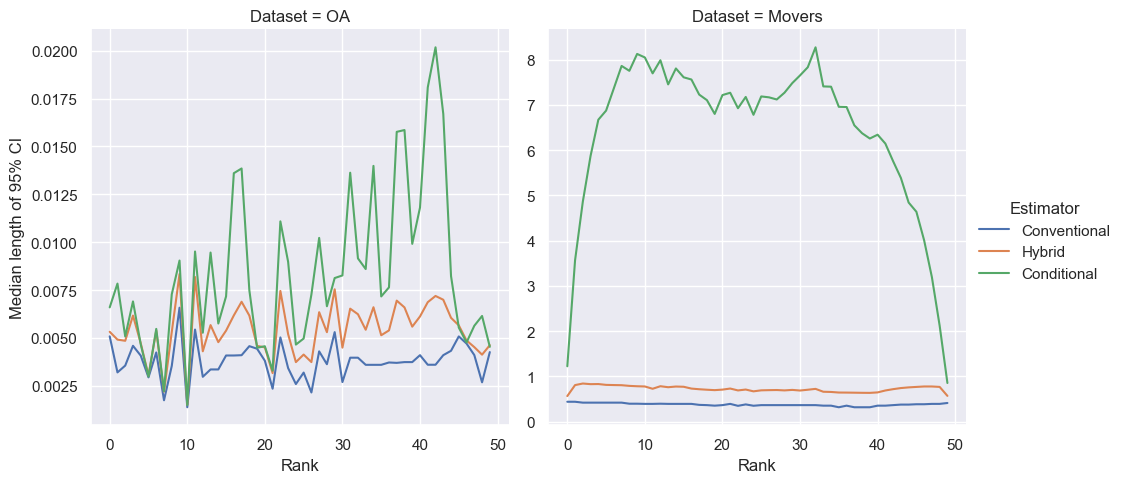

In [6]:
grid = sns.relplot(
    data=df,
    x="Rank",
    y="Length CI",
    hue="Estimator",
    ci=None,
    estimator=lambda x: np.quantile(x, .5),
    kind="line",
    col="Dataset",
    facet_kws={"sharey": False}
)
grid.set_ylabels("Median length of 95% CI")
grid.fig.savefig("plots/median_95_ci.png")
plt.show()

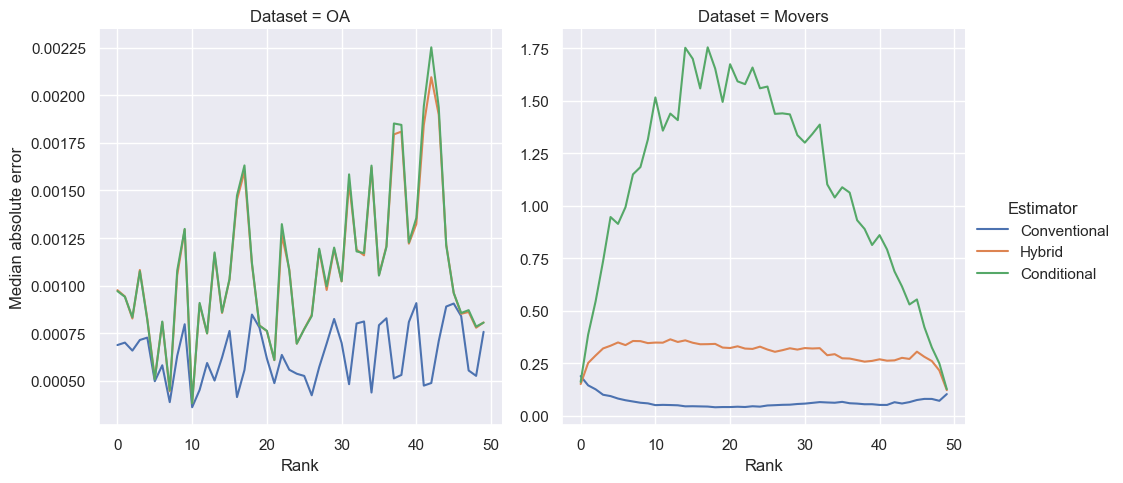

In [7]:
grid = sns.relplot(
    data=df,
    x="Rank",
    y="Absolute error",
    hue="Estimator",
    ci=None,
    estimator=lambda x: np.quantile(x, .5),
    kind="line",
    col="Dataset",
    facet_kws={"sharey": False}
)
grid.set_ylabels("Median absolute error", clear_inner=False)
grid.fig.savefig("plots/median_abs_error.png")
plt.show()

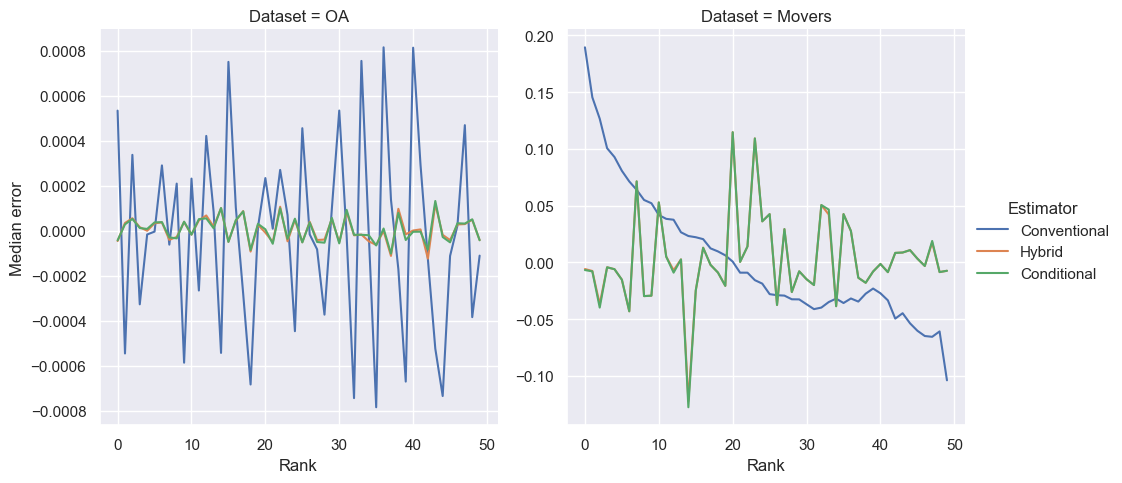

In [8]:
grid = sns.relplot(
    data=df,
    x="Rank",
    y="Error",
    hue="Estimator",
    ci=None,
    estimator=lambda x: np.quantile(x, .5),
    kind="line",
    col="Dataset",
    facet_kws={"sharey": False}
)
grid.set_ylabels("Median error", clear_inner=False)
grid.fig.savefig("plots/median_error.png")
plt.show()